In [8]:
import jupyterthemes 

In [9]:
from jupyterthemes import jtplot

In [10]:
jtplot.style(theme='onedork')

In [11]:
jupyterthemes.jtplot.style(theme='grade3')

In [12]:
jtplot.style()

In [13]:
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

In [14]:
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd

In [16]:
#download data from this website

In [17]:
#https://ca.investing.com/crypto/bitcoin/btc-cad-historical-data

# Read Data

In [18]:
btc_new=pd.read_csv('BTC_CAD Kraken Historical Data_dec18.csv')

In [19]:
btc = pd.read_csv('BTC_CAD Kraken Historical Data.csv')

# Data Cleaning

In [20]:
btc.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [21]:
btc['Price'].shape[0]

331

In [22]:
price= [btc['Price'][i].split(',')[0]+btc['Price'][i].split(',')[1] for i in range(btc['Price'].shape[0])]

In [23]:
btc2 = pd.Series(price).astype(float)

In [24]:
btc2

0      70250.4
1      68623.4
2      74687.4
3      72502.2
4      72897.7
        ...   
326    40877.0
327    39000.0
328    40155.1
329    39396.8
330    36600.6
Length: 331, dtype: float64

# Reverese the data

In [25]:
#its just how this data is from the website 

In [26]:
btc2_r= pd.Series(btc2).loc[::-1].reset_index(drop=True)

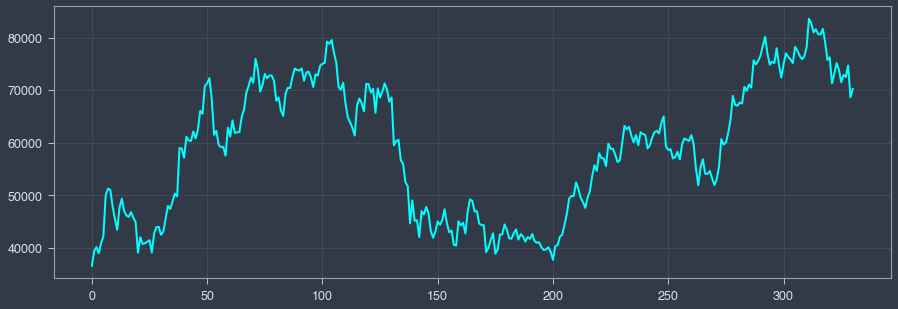

In [28]:
plt.figure(figsize=(15,5))
btc2_r.plot(c='cyan',linewidth=2)
plt.grid()
plt.show()

In [29]:
#target is from the 5th as we predict the 5th of the sequence we are createing below

In [30]:
target_btc = np.array(btc2_r[5:])

In [31]:
target_btc.shape

(326,)

In [32]:
target_btc[-1]

70250.4

In [33]:
len(btc2)

331

# Standardise the data

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler3=MinMaxScaler()

In [37]:
#Using this scaler but you can check with both

In [38]:
scaler3=StandardScaler()

In [39]:
btc2

0      70250.4
1      68623.4
2      74687.4
3      72502.2
4      72897.7
        ...   
326    40877.0
327    39000.0
328    40155.1
329    39396.8
330    36600.6
Length: 331, dtype: float64

In [40]:
btc_s=scaler3.fit_transform(np.array(btc2_r).reshape(-1, 1))

In [41]:
#we recieved an array

In [42]:
btc_s[:4]

array([[-1.75736565],
       [-1.53685622],
       [-1.47705639],
       [-1.56814803]])

In [43]:
#create a list from array

In [44]:
btc_s1= [i[0] for i in btc_s]

In [45]:
btc_s1=pd.Series(btc_s1)

In [46]:
#Scaled data ready to be modeled

In [47]:
btc_s1

0     -1.757366
1     -1.536856
2     -1.477056
3     -1.568148
4     -1.420127
         ...   
326    1.105038
327    1.073849
328    1.246174
329    0.767965
330    0.896271
Length: 331, dtype: float64

# Create Time Series Sequence for LSTM

In [48]:
k=[]
btc_series_s=[]
c=0
for s in range(len(btc2)-4):    
    for i in range(5): 
        #print(btc_s1.loc[c])
        k.append(btc_s1.loc[c]) 
        c=c+1
    btc_series_s.append(k) 
    c=c-4
    k=[]
print(btc_series_s)

[[-1.7573656472789825, -1.5368562247886053, -1.4770563910590966, -1.5681480275366855, -1.420127075525228], [-1.5368562247886053, -1.4770563910590966, -1.5681480275366855, -1.420127075525228, -1.3129242613726573], [-1.4770563910590966, -1.5681480275366855, -1.420127075525228, -1.3129242613726573, -0.7007231678403476], [-1.5681480275366855, -1.420127075525228, -1.3129242613726573, -0.7007231678403476, -0.6000263358619617], [-1.420127075525228, -1.3129242613726573, -0.7007231678403476, -0.6000263358619617, -0.6188739690696007], [-1.3129242613726573, -0.7007231678403476, -0.6000263358619617, -0.6188739690696007, -0.8653521179837245], [-0.7007231678403476, -0.6000263358619617, -0.6188739690696007, -0.8653521179837245, -1.05042956725154], [-0.6000263358619617, -0.6188739690696007, -0.8653521179837245, -1.05042956725154, -1.2174716453286145], [-0.6188739690696007, -0.8653521179837245, -1.05042956725154, -1.2174716453286145, -0.8812188284497372], [-0.8653521179837245, -1.05042956725154, -1.217

In [49]:
#We got this sequence for LSTM

In [50]:
btc_series_s

[[-1.7573656472789825,
  -1.5368562247886053,
  -1.4770563910590966,
  -1.5681480275366855,
  -1.420127075525228],
 [-1.5368562247886053,
  -1.4770563910590966,
  -1.5681480275366855,
  -1.420127075525228,
  -1.3129242613726573],
 [-1.4770563910590966,
  -1.5681480275366855,
  -1.420127075525228,
  -1.3129242613726573,
  -0.7007231678403476],
 [-1.5681480275366855,
  -1.420127075525228,
  -1.3129242613726573,
  -0.7007231678403476,
  -0.6000263358619617],
 [-1.420127075525228,
  -1.3129242613726573,
  -0.7007231678403476,
  -0.6000263358619617,
  -0.6188739690696007],
 [-1.3129242613726573,
  -0.7007231678403476,
  -0.6000263358619617,
  -0.6188739690696007,
  -0.8653521179837245],
 [-0.7007231678403476,
  -0.6000263358619617,
  -0.6188739690696007,
  -0.8653521179837245,
  -1.05042956725154],
 [-0.6000263358619617,
  -0.6188739690696007,
  -0.8653521179837245,
  -1.05042956725154,
  -1.2174716453286145],
 [-0.6188739690696007,
  -0.8653521179837245,
  -1.05042956725154,
  -1.217471645

In [51]:
#target is the orginal data starting from 5th till the last

In [52]:
btc_s1.head(15)

0    -1.757366
1    -1.536856
2    -1.477056
3    -1.568148
4    -1.420127
5    -1.312924
6    -0.700723
7    -0.600026
8    -0.618874
9    -0.865352
10   -1.050430
11   -1.217472
12   -0.881219
13   -0.752022
14   -0.934655
dtype: float64

In [53]:
target_btc_s1 = np.array(btc_s1[5:len(btc2)])

In [54]:
target_btc_s1.shape

(326,)

In [55]:
target_btc_s1

array([-1.31292426e+00, -7.00723168e-01, -6.00026336e-01, -6.18873969e-01,
       -8.65352118e-01, -1.05042957e+00, -1.21747165e+00, -8.81218828e-01,
       -7.52021852e-01, -9.34654629e-01, -1.00165442e+00, -1.02315176e+00,
       -9.52871379e-01, -1.03584828e+00, -1.10534006e+00, -1.55870055e+00,
       -1.32824684e+00, -1.43014235e+00, -1.42002456e+00, -1.39568035e+00,
       -1.37259792e+00, -1.55720221e+00, -1.27224019e+00, -1.17577816e+00,
       -1.17370413e+00, -1.29213666e+00, -1.24367695e+00, -1.05555549e+00,
       -8.58420290e-01, -9.04805971e-01, -7.94038667e-01, -6.75621906e-01,
       -7.16487360e-01,  8.26328233e-03, -4.82334923e-04, -1.37415516e-01,
        1.77000859e-01,  1.21751270e-01,  1.14456683e-01,  2.57485773e-01,
        1.50693033e-01,  2.84400824e-01,  5.66657932e-01,  5.20903133e-01,
        9.37798585e-01,  9.79121430e-01,  1.05668851e+00,  7.42690094e-01,
        2.05508890e-01,  2.67051538e-01,  5.57608952e-02,  2.01475431e-02,
        2.41063347e-02, -

In [56]:
# Convert the series into array and reshape it

In [57]:
btc_data_s1 = np.array(btc_series_s[:-1])

In [58]:
btc_data_s1

array([[-1.75736565, -1.53685622, -1.47705639, -1.56814803, -1.42012708],
       [-1.53685622, -1.47705639, -1.56814803, -1.42012708, -1.31292426],
       [-1.47705639, -1.56814803, -1.42012708, -1.31292426, -0.70072317],
       ...,
       [ 1.28233174,  1.18537289,  0.99466481,  1.10503781,  1.07384853],
       [ 1.18537289,  0.99466481,  1.10503781,  1.07384853,  1.24617425],
       [ 0.99466481,  1.10503781,  1.07384853,  1.24617425,  0.76796485]])

In [59]:
#reshape the target 

In [60]:
target_btc_s2 =target_btc_s1.reshape(-1,1)

In [61]:
target_btc_s2.shape

(326, 1)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(btc_data_s1,target_btc_s2,test_size=0.2)

In [63]:
#x_train, x_test, y_train, y_test = train_test_split(btc_data_s1,target_btc_s2,test_size=0.2,shuffle=False,stratify=None)

# Creating the Model and Fitting

In [64]:
model=Sequential()
model.add(LSTM((30), batch_input_shape=(None,5,1), return_sequences=True,dropout=0.5))
model.add(LSTM((10), batch_input_shape=(None,5,1), return_sequences=True,dropout=0.2))
model.add(LSTM((5), batch_input_shape=(None,5,1), return_sequences=True,dropout=0.5))
model.add(LSTM((5), batch_input_shape=(None,5,1), return_sequences=False,dropout=0.0))
#model.add(Dense((10)))
model.add(Dense((1)))
#model.add(LSTM((1), return_sequences=False))
model.compile(loss = 'mean_absolute_error', optimizer='adam', metrics=['mse'])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 30)             3840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 10)             1640      
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 5)              320       
_________________________________________________________________
lstm_3 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 6,026
Trainable params: 6,026
Non-trainable params: 0
_________________________________________________________________


In [66]:
x_train.shape,x_test.shape

((260, 5), (66, 5))

In [67]:
history =model.fit(x_train.reshape(x_train.shape[0],5,1),y_train,epochs=250,\
                     validation_data=(x_test.reshape(x_test.shape[0], 5,1),y_test))

Epoch 1/250
9/9 [==============================] - 52s 508ms/step - loss: 0.8660 - mse: 1.0012 - val_loss: 0.8392 - val_mse: 0.9899
Epoch 2/250
9/9 [==============================] - 0s 34ms/step - loss: 0.8262 - mse: 0.8952 - val_loss: 0.8272 - val_mse: 0.9626
Epoch 3/250
9/9 [==============================] - 0s 30ms/step - loss: 0.8430 - mse: 0.9239 - val_loss: 0.8104 - val_mse: 0.9208
Epoch 4/250
9/9 [==============================] - 0s 28ms/step - loss: 0.7973 - mse: 0.8396 - val_loss: 0.7853 - val_mse: 0.8634
Epoch 5/250
9/9 [==============================] - 0s 30ms/step - loss: 0.7669 - mse: 0.7870 - val_loss: 0.7511 - val_mse: 0.7846
Epoch 6/250
9/9 [==============================] - 0s 29ms/step - loss: 0.7130 - mse: 0.6987 - val_loss: 0.7138 - val_mse: 0.7012
Epoch 7/250
9/9 [==============================] - 0s 22ms/step - loss: 0.6973 - mse: 0.6729 - val_loss: 0.6694 - val_mse: 0.6096
Epoch 8/250
9/9 [==============================] - 0s 31ms/step - loss: 0.6405 - mse: 0.

9/9 [==============================] - 0s 33ms/step - loss: 0.3609 - mse: 0.2193 - val_loss: 0.2903 - val_mse: 0.1275
Epoch 64/250
9/9 [==============================] - 0s 23ms/step - loss: 0.3105 - mse: 0.1611 - val_loss: 0.2910 - val_mse: 0.1286
Epoch 65/250
9/9 [==============================] - 0s 23ms/step - loss: 0.3007 - mse: 0.1582 - val_loss: 0.2825 - val_mse: 0.1250
Epoch 66/250
9/9 [==============================] - 0s 27ms/step - loss: 0.3383 - mse: 0.2066 - val_loss: 0.2906 - val_mse: 0.1295
Epoch 67/250
9/9 [==============================] - 0s 25ms/step - loss: 0.3019 - mse: 0.1670 - val_loss: 0.3011 - val_mse: 0.1376
Epoch 68/250
9/9 [==============================] - 0s 26ms/step - loss: 0.2942 - mse: 0.1415 - val_loss: 0.3029 - val_mse: 0.1410
Epoch 69/250
9/9 [==============================] - 0s 22ms/step - loss: 0.3296 - mse: 0.1840 - val_loss: 0.2870 - val_mse: 0.1251
Epoch 70/250
9/9 [==============================] - 0s 22ms/step - loss: 0.3518 - mse: 0.2149 - 

9/9 [==============================] - 0s 41ms/step - loss: 0.2837 - mse: 0.1444 - val_loss: 0.2946 - val_mse: 0.1377
Epoch 126/250
9/9 [==============================] - 0s 34ms/step - loss: 0.2808 - mse: 0.1451 - val_loss: 0.2856 - val_mse: 0.1273
Epoch 127/250
9/9 [==============================] - 0s 29ms/step - loss: 0.2791 - mse: 0.1699 - val_loss: 0.2837 - val_mse: 0.1245
Epoch 128/250
9/9 [==============================] - 0s 35ms/step - loss: 0.2707 - mse: 0.1375 - val_loss: 0.2888 - val_mse: 0.1289
Epoch 129/250
9/9 [==============================] - 0s 32ms/step - loss: 0.3250 - mse: 0.1958 - val_loss: 0.2954 - val_mse: 0.1342
Epoch 130/250
9/9 [==============================] - 0s 30ms/step - loss: 0.3264 - mse: 0.1961 - val_loss: 0.2912 - val_mse: 0.1305
Epoch 131/250
9/9 [==============================] - 0s 28ms/step - loss: 0.2929 - mse: 0.1520 - val_loss: 0.2820 - val_mse: 0.1223
Epoch 132/250
9/9 [==============================] - 0s 32ms/step - loss: 0.3082 - mse: 0.

9/9 [==============================] - 0s 27ms/step - loss: 0.3220 - mse: 0.1832 - val_loss: 0.3177 - val_mse: 0.1512
Epoch 188/250
9/9 [==============================] - 0s 29ms/step - loss: 0.2551 - mse: 0.1192 - val_loss: 0.3330 - val_mse: 0.1663
Epoch 189/250
9/9 [==============================] - 0s 27ms/step - loss: 0.2616 - mse: 0.1263 - val_loss: 0.3471 - val_mse: 0.1746
Epoch 190/250
9/9 [==============================] - 0s 26ms/step - loss: 0.2799 - mse: 0.1425 - val_loss: 0.3224 - val_mse: 0.1502
Epoch 191/250
9/9 [==============================] - 0s 28ms/step - loss: 0.2909 - mse: 0.1502 - val_loss: 0.3098 - val_mse: 0.1401
Epoch 192/250
9/9 [==============================] - 0s 30ms/step - loss: 0.2985 - mse: 0.1536 - val_loss: 0.3301 - val_mse: 0.1625
Epoch 193/250
9/9 [==============================] - 0s 29ms/step - loss: 0.2701 - mse: 0.1403 - val_loss: 0.3416 - val_mse: 0.1719
Epoch 194/250
9/9 [==============================] - 0s 28ms/step - loss: 0.2786 - mse: 0.

9/9 [==============================] - 0s 29ms/step - loss: 0.2419 - mse: 0.1018 - val_loss: 0.3614 - val_mse: 0.1899
Epoch 250/250
9/9 [==============================] - 0s 32ms/step - loss: 0.2609 - mse: 0.1300 - val_loss: 0.3756 - val_mse: 0.2021


# Check the Results and Loss

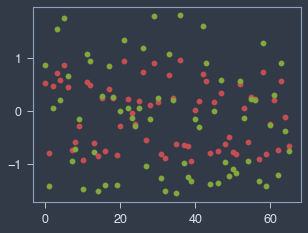

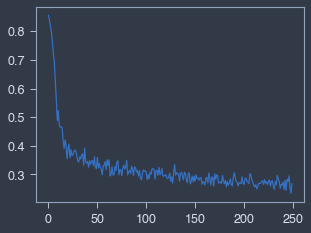

In [68]:
results = model.predict(x_test.reshape(66, 5,1))
plt.scatter(range(x_test.shape[0]), results,c='r')
plt.scatter(range(x_test.shape[0]), y_test, c='g')
plt.show()

plt.plot(history.history['loss'])

# Metrics

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
mean_squared_error(y_test, results)

0.20210375626414015

In [71]:
#best model is 1 and negative is model giving very bad results
r2_score(y_test, results)

0.7953354183385715

# Making Future Predictions

In [72]:
btc_data_s1.shape

(326, 5)

In [73]:
len_sequences = btc_data_s1.shape[0]
len_sequences

326

In [74]:
#make a list of future prediction - future btc

#1 - make a list of the last sequence = listn   - listn=btc_data_s1[325].tolist()
#2 - make last sequence prediction  = pred 
#3 - add last prediction to list = pred=model.predict(new_array)
#4 - add the prediction to future btc list = future_btc.append(pred.tolist()[0][0])
#5 update the list of sequence with removing the ist value[0] and starting from [1] = listn=listn[1:]

In [75]:
f=[]
future_btc=[]
listn=btc_data_s1[len_sequences-1].tolist()
print(listn)
start_pred=model.predict(btc_data_s1[len_sequences-1].reshape(-1, 5,1))[0][0]
#print(start_pred)
for i in range(50):
    #listn.pop()
    #listn.append(start_pred)
    new_array=np.array(listn).reshape(-1,5,1)
    #print(new_array)
    pred=model.predict(new_array)
    #print(pred,"PPP")
    print(pred.tolist())
    listn.append(pred.tolist()[0][0])
    future_btc.append(pred.tolist()[0][0])
    print(listn[1:])
    listn=listn[1:]
    

[0.9946648124012721, 1.105037814231445, 1.0738485299903522, 1.2461742541967646, 0.7679648492966699]
[[0.641499400138855]]
[1.105037814231445, 1.0738485299903522, 1.2461742541967646, 0.7679648492966699, 0.641499400138855]
[[0.62245774269104]]
[1.0738485299903522, 1.2461742541967646, 0.7679648492966699, 0.641499400138855, 0.62245774269104]
[[0.5943912267684937]]
[1.2461742541967646, 0.7679648492966699, 0.641499400138855, 0.62245774269104, 0.5943912267684937]
[[0.5726916790008545]]
[0.7679648492966699, 0.641499400138855, 0.62245774269104, 0.5943912267684937, 0.5726916790008545]
[[0.4740246534347534]]
[0.641499400138855, 0.62245774269104, 0.5943912267684937, 0.5726916790008545, 0.4740246534347534]
[[0.44031500816345215]]
[0.62245774269104, 0.5943912267684937, 0.5726916790008545, 0.4740246534347534, 0.44031500816345215]
[[0.416016161441803]]
[0.5943912267684937, 0.5726916790008545, 0.4740246534347534, 0.44031500816345215, 0.416016161441803]
[[0.3962903618812561]]
[0.5726916790008545, 0.4740

In [76]:
#this is the future predictions they are still in scaled format

In [77]:
future_btc[:10]

[0.641499400138855,
 0.62245774269104,
 0.5943912267684937,
 0.5726916790008545,
 0.4740246534347534,
 0.44031500816345215,
 0.416016161441803,
 0.3962903618812561,
 0.3808860778808594,
 0.36366212368011475]

In [78]:
#predict the full data

In [79]:
pred_btc=model.predict(btc_data_s1.reshape(-1, 5,1))

In [80]:
#over all error

<h3> Over all Metrics

In [81]:
mean_squared_error(target_btc_s2, pred_btc)

0.19212071026563127

In [82]:
#best model is 1 and negative is model giving very bad results
r2_score(target_btc_s2, pred_btc)

0.803483282433651

In [83]:
len(pred_btc)

326

In [84]:
pred_btc_list=[i[0] for i in pred_btc]

In [85]:
#add the Future predictions to previous data to create the full list

In [86]:
full_btc=pred_btc_list+future_btc

# Plot the Time Series Predictions

In [87]:
#NEW DATA TO COMPARE

In [88]:
btc_new.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [89]:
btc_new['Price'].shape[0]

352

In [90]:
price_new= [btc_new['Price'][i].split(',')[0]+btc_new['Price'][i].split(',')[1] for i in range(btc_new['Price'].shape[0])]

In [91]:
btc2_new = pd.Series(price_new).astype(float)

In [92]:
btc2_new

0      59705.1
1      59776.0
2      60684.4
3      62551.2
4      62248.7
        ...   
347    40877.0
348    39000.0
349    40155.1
350    39396.8
351    36600.6
Length: 352, dtype: float64

# Reverese the NEW data

In [93]:
#its just how this data is from the website 

In [94]:
btc2_new_r= pd.Series(btc2_new).loc[::-1].reset_index(drop=True)

In [95]:
btc2_new_r.shape

(352,)

In [96]:
list(btc2_new_r[10:])

[45565.0,
 43446.8,
 47710.7,
 49349.0,
 47033.1,
 46183.5,
 45910.9,
 46802.1,
 45749.9,
 44868.7,
 39119.8,
 42042.1,
 40750.0,
 40878.3,
 41187.0,
 41479.7,
 39138.8,
 42752.3,
 43975.5,
 44001.8,
 42500.0,
 43114.5,
 45500.0,
 47999.8,
 47411.6,
 48816.2,
 50317.8,
 49799.6,
 58989.9,
 58879.0,
 57142.6,
 61129.6,
 60429.0,
 60336.5,
 62150.2,
 60796.0,
 62491.5,
 66070.7,
 65490.5,
 70777.0,
 71301.0,
 72284.6,
 68302.9,
 61491.1,
 62271.5,
 59592.2,
 59140.6,
 59190.8,
 57552.5,
 62872.9,
 61160.2,
 64249.2,
 61877.8,
 61995.0,
 62027.2,
 64895.4,
 66331.4,
 69501.0,
 70797.3,
 72388.0,
 71397.1,
 75943.7,
 73945.6,
 69745.0,
 70945.7,
 73074.1,
 72258.6,
 72775.0,
 72770.9,
 71723.6,
 67971.4,
 68586.4,
 66128.4,
 65093.9,
 69350.3,
 70430.7,
 70396.8,
 72500.0,
 74100.0,
 73873.5,
 73691.0,
 74123.3,
 71775.6,
 73310.2,
 73531.5,
 72463.1,
 70586.6,
 72999.7,
 72752.8,
 74646.8,
 75000.0,
 75182.2,
 79227.8,
 78796.0,
 79518.4,
 77055.7,
 75268.5,
 70588.7,
 70052.7,
 71406.5,


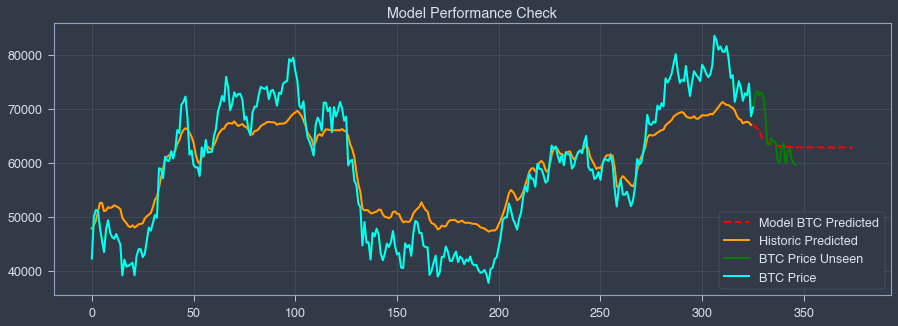

In [105]:
plt.figure(figsize=(15,5))
plt.plot(scaler3.inverse_transform(np.array(full_btc[1:]).reshape(-1, 1))\
         ,c='red',linestyle='--',linewidth=2, label='Model BTC Predicted')
plt.plot(scaler3.inverse_transform(pred_btc[1:]),c='orange',linewidth=2,label='Historic Predicted')
plt.plot(list(btc2_new_r[5:]),c='green',linewidth=2,label='BTC Price Unseen')
plt.plot(scaler3.inverse_transform(target_btc_s2),c='cyan',linewidth=2, \
         label='BTC Price')
plt.legend()
plt.title('Model Performance Check')
plt.grid()
plt.show()

# Enumerate the predictions to see the daily results

In [107]:
future_dates=scaler3.inverse_transform(np.array(full_btc[1:]).reshape(-1, 1))

In [108]:
#observations the dip will continue till dat 8th
#recommendations try differnt LSTM models and do a committee voting\
#from many results to provide your final recommendations

In [109]:
for count, value in enumerate(future_dates):
    print("Day",count, "BTC in CAD",value)
    

Day 0 BTC in CAD [47812.17072071]
Day 1 BTC in CAD [48467.67345245]
Day 2 BTC in CAD [49285.15776999]
Day 3 BTC in CAD [50914.91952746]
Day 4 BTC in CAD [52571.64609334]
Day 5 BTC in CAD [52552.93716009]
Day 6 BTC in CAD [51023.37510692]
Day 7 BTC in CAD [51154.83194911]
Day 8 BTC in CAD [51746.59672458]
Day 9 BTC in CAD [51631.04621698]
Day 10 BTC in CAD [51780.47355151]
Day 11 BTC in CAD [52131.97066763]
Day 12 BTC in CAD [51908.72116127]
Day 13 BTC in CAD [51733.57537355]
Day 14 BTC in CAD [51408.99469305]
Day 15 BTC in CAD [49806.21361631]
Day 16 BTC in CAD [49249.4442886]
Day 17 BTC in CAD [48820.86890707]
Day 18 BTC in CAD [48234.62845565]
Day 19 BTC in CAD [48072.48587916]
Day 20 BTC in CAD [48418.6944886]
Day 21 BTC in CAD [47996.95251981]
Day 22 BTC in CAD [48265.2401191]
Day 23 BTC in CAD [48603.09308449]
Day 24 BTC in CAD [48655.96454648]
Day 25 BTC in CAD [48773.5754327]
Day 26 BTC in CAD [49678.5933412]
Day 27 BTC in CAD [50070.28371277]
Day 28 BTC in CAD [50390.09589411]


Day 238 BTC in CAD [61009.12934446]
Day 239 BTC in CAD [61828.70899752]
Day 240 BTC in CAD [62295.42916011]
Day 241 BTC in CAD [62318.7539159]
Day 242 BTC in CAD [62787.793894]
Day 243 BTC in CAD [63511.41231973]
Day 244 BTC in CAD [62540.79410245]
Day 245 BTC in CAD [61028.80743416]
Day 246 BTC in CAD [60314.68292475]
Day 247 BTC in CAD [59625.94109331]
Day 248 BTC in CAD [58836.9666792]
Day 249 BTC in CAD [59128.77564322]
Day 250 BTC in CAD [59002.260762]
Day 251 BTC in CAD [59786.94946009]
Day 252 BTC in CAD [60824.55369659]
Day 253 BTC in CAD [61380.7183644]
Day 254 BTC in CAD [61415.72968448]
Day 255 BTC in CAD [61566.08706153]
Day 256 BTC in CAD [61285.85119358]
Day 257 BTC in CAD [59102.86445469]
Day 258 BTC in CAD [55693.30185945]
Day 259 BTC in CAD [55283.40971313]
Day 260 BTC in CAD [57006.91208444]
Day 261 BTC in CAD [57521.56307073]
Day 262 BTC in CAD [57170.76906071]
Day 263 BTC in CAD [56689.30728966]
Day 264 BTC in CAD [56341.7172213]
Day 265 BTC in CAD [55822.52316061]
